# L01

各種ライブラリの使い方を学習

In [1]:
import numpy
numpy.version.full_version
import numpy as np

a = np.array([0,1,2,3,4,5])
b = a.reshape((3,2))

b[1][0] = 77
c = a.reshape((3,2)).copy()
c[0][0] = -99
a = np.array([0,1,2,3,4,5])
a > 4
a[a>4]
a[a>3] = 3
a.clip(1,2)

array([1, 1, 2, 2, 2, 2])

In [2]:
# 不適切な値への対応
c = np.array([1,2,np.NAN, 3,4])
np.mean(c[~np.isnan(c)])

2.5

In [3]:
# 処理速度の比較
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
print("Normal Python {} sec".format(normal_py_sec))
print("Naive Numpy {} sec".format(naive_np_sec))
print("Good Numpy {} sec".format(good_np_sec))

Normal Python 1.430459195995354 sec
Naive Numpy 1.7487881949928124 sec
Good Numpy 0.042907741997623816 sec


In [4]:
# np.arrayは常に一種類の形しか取らない
a = np.array([1,2,3])
a.dtype

dtype('int64')

## SciPy

数値計算に関する書籍に乗っているようなアルゴリズムでは大体がSciPyに実装済み

* 行列計算
* 線形代数
* 最適化問題
* クラスタリング
* 空間操作
* 高速フーリエ変換
* etc

DRYのためにまずはSciPyモジュールからアルゴリズムを探すこと

In [5]:
import scipy, numpy
scipy.version.full_version

'0.17.1'

In [6]:
scipy.dot is numpy.dot

True

## はじめての（簡単な）機械学習アプリケーション

用意された題材を使って練習

In [7]:
import scipy as sp
data = sp.genfromtxt("resource/ch01/data/web_traffic.tsv", delimiter="\t")

In [8]:
# 前処理とデータ整形
# 一番目には経過時間
x = data[:,0]
y = data[:,1]

319874314.777
182006476.432
125902934.376
111276309.052
Error inflection=136467834.76562506
Error d=1: 7942039.438584683
Error d=2: 6210544.319458029
Error d=3: 6151414.804406725
Error d=10: 7438353.485478759
Error d=53: 7876687.518451691
         2
0.09424 x - 106.2 x - 6.808e+04
[ 9.42581509]
100,100 hits/hour expected at week 9.425815085187441


/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/

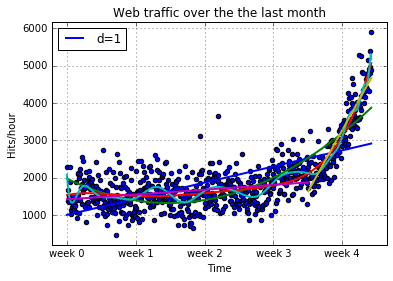

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(x,y)

plt.title("Web traffic over the the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week {}'.format(w) for w in range(10)])
plt.autoscale(tight=True)

def error(f, x, y):
    return sp.sum((f(x)-y) ** 2)

fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
f1 = sp.poly1d(fp1)
print(error(f1, x, y))
fx = sp.linspace(0, x[-1], 1000)  # plot用に"x値"を生成
plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d={}".format(f1.order)], loc="upper left")

f2p = sp.polyfit(x, y, 2)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))
plt.plot(fx, f2(fx), linewidth=2)


f5p = sp.polyfit(x, y, 5)
f5 = sp.poly1d(f5p)
print(error(f5, x, y))
plt.plot(fx, f5(fx), linewidth=2)

n = 100
fnp = sp.polyfit(x, y,  n)
fn = sp.poly1d(fnp)
print(error(fn, x, y))
plt.plot(fx, fn(fx), linewidth=2)

inflection = 3.5 * 7 * 24  # 変化点の時間
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)


fxa = sp.linspace(0, x[inflection], 1000)
fxb = sp.linspace(x[inflection], x[-1], 1000)
print("Error inflection={}".format(fa_error + fb_error))
plt.plot(fxa, fa(fxa), linewidth=2)
plt.plot(fxb, fb(fxb), linewidth=2)


frac = 0.3  # テストに用いるデータの割合
split_idx = int(frac * len(xb))
# 全テータの30%をランダムに選び出す
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])  #テスト用のデータインデックス配列
train = sorted(shuffled[split_idx:])  # 訓練用のデータインデックス配列

# それぞれ訓練データを用いて訓練を行う
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

# テストデータを用いて評価
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d={}: {}".format(f.order, error(f, xb[test], yb[test])))

    
print(fbt2 - 100000)

from scipy.optimize import fsolve

reached_max = fsolve(fbt2-100000, 800) / (7*24)
print(reached_max)
print("100,100 hits/hour expected at week {}".format(reached_max[0]))


plt.grid()
plt.show()